## TP Final
### 10/10/10

---

### Plan du notebook :
1. **Exploration des Données**
    - Aperçu des données
    - Statistiques descriptives
    - Valeurs manquantes
    - Visualisation des données
    
2. **Pré-traitement des Données**
    - Gestion des valeurs manquantes
    - Encodage des variables catégorielles
    - Normalisation des variables numériques
    
3. **Analyse des Données**
    - Correlation entre les variables
    - Analyse en composantes principales (ACP) si nécessaire
    
4. **Modélisation**
    - Définition de la problématique
    - Séparation en ensembles d'entraînement et de test
    - Choix des modèles à tester
    - Entraînement des modèles
    - Évaluation des modèles



Commençons par l'**Étape 1 : Exploration des Données**. Nous allons charger le jeu de données et effectuer une première exploration pour mieux comprendre sa structure et son contenu.


In [33]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Charger les données
file_path = 'fr-esr-insertion_professionnelle-master.csv'
data = pd.read_csv(file_path, delimiter=';')

# Aperçu des données
data_overview = {
    "Premières lignes": data.head(),
    "Informations": data.info(),
    "Description": data.describe(include='all')
}

data_overview["Premières lignes"]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17669 entries, 0 to 17668
Data columns (total 33 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Annee                                             17669 non-null  int64  
 1   Diplôme                                           17669 non-null  object 
 2   Numéro de l'établissement                         17669 non-null  object 
 3   Établissement                                     17669 non-null  object 
 4   Établissement actuel                              3273 non-null   object 
 5   Code de l'académie                                17344 non-null  object 
 6   Académie                                          17344 non-null  object 
 7   Code du domaine                                   17669 non-null  object 
 8   Domaine                                           17669 non-null  object 
 9   Code de la discip

,Annee,Diplôme,Numéro de l'établissement,Établissement,Établissement actuel,Code de l'académie,Académie,Code du domaine,Domaine,Code de la discipline,...,Taux de chômage régional,Salaire net mensuel médian régional,% emplois cadre,% emplois extérieurs à la région de l’université,% femmes,Salaire net mensuel régional 1er quartile,Salaire net mensuel régional 3ème quartile,cle_ETAB,cle_DISC,Id_Paysage
0,2010,MASTER LMD,0060931E,Nice - Sophia-Antipolis,Université Côte d'Azur (UCA),A23,Nice,DEG,"Droit, économie et gestion",disc04,...,11.7,1750,nd,nd,nd,NaN,NaN,Nice - Sophia-Antipolis_30,disc04_30,7CYWd
1,2010,MASTER LMD,0060931E,Nice - Sophia-Antipolis,Université Côte d'Azur (UCA),A23,Nice,SHS,Sciences humaines et sociales,disc08,...,11.7,1750,nd,nd,nd,NaN,NaN,Nice - Sophia-Antipolis_30,disc08_30,7CYWd
2,2010,MASTER LMD,0134009M,Aix-Marseille,NaN,A02,Aix-Marseille,SHS,Sciences humaines et sociales,disc08,...,11.7,1750,nd,nd,nd,NaN,NaN,Aix-Marseille_30,disc08_30,xJdyB
3,2010,MASTER LMD,0134009M,Aix-Marseille,NaN,A02,Aix-Marseille,SHS,Sciences humaines et sociales,disc10,...,11.7,1750,nd,nd,nd,NaN,NaN,Aix-Marseille_30,disc10_30,xJdyB
4,2010,MASTER LMD,0141408E,Caen Normandie,NaN,A70,Normandie,DEG,"Droit, économie et gestion",disc01,...,9.7,1680,nd,nd,nd,NaN,NaN,Caen Normandie_30,disc01_30,p25Q3


Les données contiennent 17,669 entrées et 33 colonnes.
Il est important de noter que certaines colonnes ont des valeurs manquantes (par exemple, "Établissement actuel") et certaines colonnes contiennent des données numériques qui sont en fait stockées comme des chaînes de caractères (par exemple, le taux d'insertion). 

### 1. Exploration des Données
#### 1.1 Statistiques descriptives
Jetons un coup d'œil aux statistiques descriptives pour obtenir une meilleure compréhension de la distribution de chaque variable. Cela comprendra la moyenne, la médiane, le minimum, le maximum, et d'autres statistiques descriptives pour les variables numériques, et les fréquences pour les variables catégorielles. 

#### 1.2 Valeurs manquantes
Il est également crucial d'identifier les colonnes qui ont des valeurs manquantes, car cela peut influencer la façon dont nous modélisons nos données ultérieurement.

#### 1.3 Visualisation des données
Nous utiliserons des visualisations pour comprendre la distribution des variables individuelles ainsi que les relations entre différentes paires de variables.

Passons à l'étape suivante.


(               Annee     Diplôme Numéro de l'établissement Établissement  \
 count   17669.000000       17669                     17669         17669   
 unique           NaN           2                        99            95   
 top              NaN  MASTER LMD                      UNIV    Strasbourg   
 freq             NaN       16528                       325           325   
 mean     2014.910578         NaN                       NaN           NaN   
 
                       Établissement actuel Code de l'académie    Académie  \
 count                                 3273              17344       17344   
 unique                                  14                 29          29   
 top     Université Clermont Auvergne (UCA)                A25  Versailles   
 freq                                   368               1318        1318   
 mean                                   NaN                NaN         NaN   
 
        Code du domaine                          Domaine Code de l

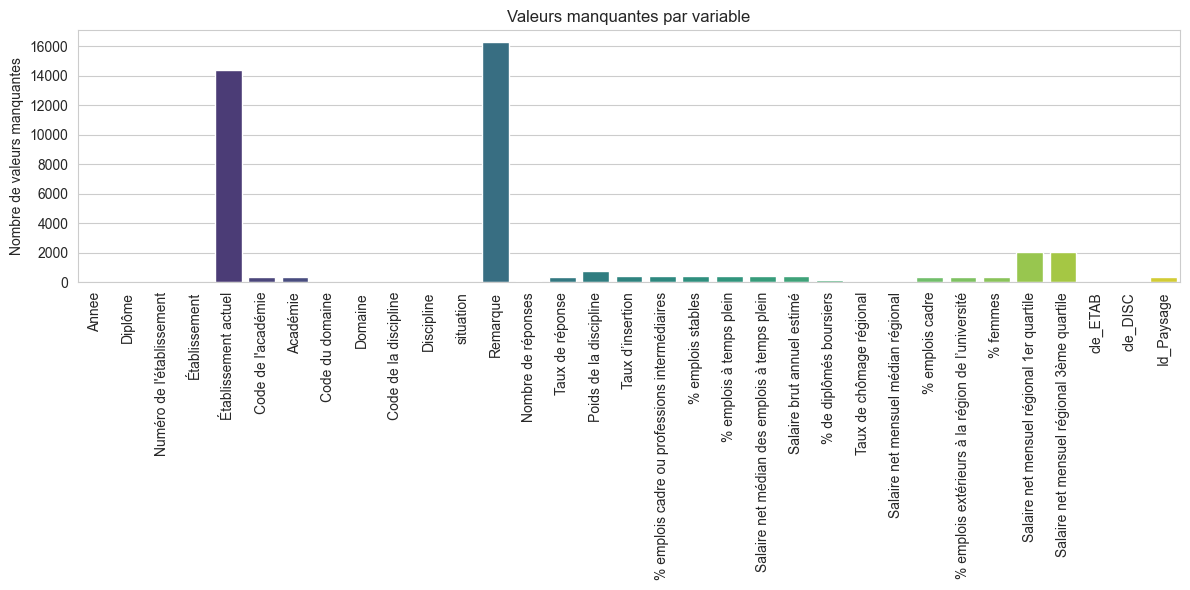

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistiques descriptives
desc_stats = data.describe(include='all')

# Valeurs manquantes par colonne
missing_values = data.isnull().sum()

# Visualisation des valeurs manquantes
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Valeurs manquantes par variable')
plt.tight_layout()

(desc_stats.head(), missing_values.head())



### Résultsts de la partie 1. Exploration des Données
#### 1.1 Statistiques descriptives
Nous avons examiné les statistiques descriptives des données et voici quelques points notables :
- La variable "Diplôme" a principalement la valeur "MASTER LMD".
- Certains établissements et disciplines sont plus représentés que d'autres dans les données.
- Plusieurs variables numériques semblent être stockées sous forme de chaînes de caractères et devront être converties pour des analyses futures.

#### 1.2 Valeurs manquantes
La variable "Établissement actuel" a un grand nombre de valeurs manquantes (14,396), suivie de plusieurs autres variables avec un nombre significatif de valeurs manquantes. Cela nécessitera une attention particulière lors du prétraitement des données.

#### 1.3 Visualisation des données
Le graphique ci-dessus montre le nombre de valeurs manquantes pour chaque variable. Nous pouvons voir que certaines variables ont un grand nombre de valeurs manquantes, ce qui pourrait être un facteur limitant pour certaines analyses.


### 2. Pré-traitement des Données

Comme mentionné précédemment, le pré-traitement des données implique de gérer les valeurs manquantes, de convertir les variables au bon type de données, et de traiter les valeurs aberrantes ou les erreurs. Les étapes spécifiques peuvent inclure :
- **Gestion des valeurs manquantes** : Décider d'éliminer ou d'imputer les valeurs manquantes en fonction de leur nature et de leur quantité.
- **Conversion de types de données** : Changer les types de données pour une utilisation appropriée dans l'analyse.
- **Encodage des variables catégorielles** : Convertir les variables catégorielles en un format qui peut être utilisé pour la modélisation.
- **Normalisation des variables numériques** : Mettre à l'échelle les variables numériques pour les modèles qui sont sensibles à la gamme de données.
- **Détection et traitement des valeurs aberrantes** : Identifier et gérer les valeurs aberrantes qui peuvent fausser l'analyse.

#### 2.1 Gestion des Valeurs Manquantes
Nous devons décider si nous voulons supprimer les lignes/colonnes avec des valeurs manquantes ou les imputer en utilisant une certaine stratégie (moyenne, médiane, mode, etc.).

#### 2.2 Conversion des Types de Données
Certaines variables numériques, comme le "Taux d’insertion" et les variables de salaire, sont actuellement des chaînes de caractères et doivent être converties en nombres pour une analyse plus approfondie.

#### 2.3 Encodage des Variables Catégorielles
Les modèles de machine learning nécessitent des entrées numériques, donc nous devons convertir les variables catégorielles en un format numérique, souvent en utilisant l'encodage one-hot.

#### 2.4 Normalisation des Variables Numériques
Cela peut être nécessaire si nous utilisons des algorithmes de machine learning sensibles à l'échelle des variables, comme k-NN ou SVM.

#### 2.5 Détection et Traitement des Valeurs Aberrantes
Cela peut impliquer de visualiser les données et/ou d'appliquer des méthodes statistiques pour identifier les valeurs aberrantes.

Commençons par la gestion des valeurs manquantes et la conversion des types de données.


In [35]:
# Conversion des colonnes avec des pourcentages en float
percentage_columns = [
    "Taux d’insertion",
    "% emplois cadre ou professions intermédiaires",
    "% emplois stables",
    "% emplois à temps plein",
    "% de diplômés boursiers",
    "Taux de chômage régional",
    "% emplois cadre",
    "% emplois extérieurs à la région de l’université",
    "% femmes"
]

# Convertir les colonnes de pourcentage en float et gérer les valeurs 'nd' et 'ns'
for col in percentage_columns:
    data[col] = pd.to_numeric(data[col].apply(lambda x: None if x in ['nd', 'ns'] else x), errors='coerce')

# Convertir les colonnes de salaire en float (en supprimant les caractères non numériques)
salary_columns = [
    "Salaire net médian des emplois à temps plein",
    "Salaire brut annuel estimé",
    "Salaire net mensuel médian régional",
    "Salaire net mensuel régional 1er quartile",
    "Salaire net mensuel régional 3ème quartile"
]

# Convertir les colonnes de salaire en float et gérer les valeurs 'nd' et 'ns'
for col in salary_columns:
    data[col] = pd.to_numeric(data[col].str.replace(r'\D', ''), errors='coerce')

# Vérifier les conversions
data[percentage_columns + salary_columns].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17669 entries, 0 to 17668
Data columns (total 14 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Taux d’insertion                                  9785 non-null   float64
 1   % emplois cadre ou professions intermédiaires     8831 non-null   float64
 2   % emplois stables                                 8927 non-null   float64
 3   % emplois à temps plein                           8859 non-null   float64
 4   % de diplômés boursiers                           17471 non-null  float64
 5   Taux de chômage régional                          17218 non-null  float64
 6   % emplois cadre                                   8356 non-null   float64
 7   % emplois extérieurs à la région de l’université  8526 non-null   float64
 8   % femmes                                          9282 non-null   float64
 9   Salaire net média

Il semble y avoir une erreur car une ou plusieurs colonnes parmi les colonnes de salaire ne sont pas de type string, ce qui empêche l'utilisation de l'accessoire `.str`. Cela pourrait être dû au fait que certaines colonnes sont déjà numériques ou ont des valeurs manquantes qui affectent le type de données. 

Vérifions les types de données des colonnes spécifiées pour les salaires et ajustons le code en conséquence.


In [36]:
# Vérification des types de données pour les colonnes de salaire
data[salary_columns].dtypes


Salaire net médian des emplois à temps plein    float64
Salaire brut annuel estimé                      float64
Salaire net mensuel médian régional             float64
Salaire net mensuel régional 1er quartile       float64
Salaire net mensuel régional 3ème quartile      float64
dtype: object

Il semble que les colonnes de salaire soient déjà dans un format numérique (`float64`), ce qui est probablement la raison pour laquelle nous avons rencontré une erreur lors de l'essai d'utilisation de méthodes de chaîne de caractères. Cela indique que la conversion précédente a probablement déjà été effectuée avec succès. 

Maintenant, nous pouvons examiner la gestion des valeurs manquantes. Pour ce faire, nous devons décider si nous voulons imputer ces valeurs manquantes ou les supprimer. Cette décision peut dépendre du contexte et de la quantité de données manquantes pour chaque variable. 

Si une variable a une grande proportion de valeurs manquantes, nous pourrions envisager de la supprimer. Si une variable a quelques valeurs manquantes, nous pourrions les imputer en utilisant la moyenne, la médiane, ou une autre méthode.

Vérifions la proportion de valeurs manquantes pour chaque variable afin de prendre une décision éclairée.


Remarque                                            92.127455
Établissement actuel                                81.476031
Salaire brut annuel estimé                          57.224518
Salaire net médian des emplois à temps plein        57.224518
% emplois cadre                                     52.708133
% emplois extérieurs à la région de l’université    51.745996
% emplois cadre ou professions intermédiaires       50.019809
% emplois à temps plein                             49.861339
% emplois stables                                   49.476484
% femmes                                            47.467316
dtype: float64

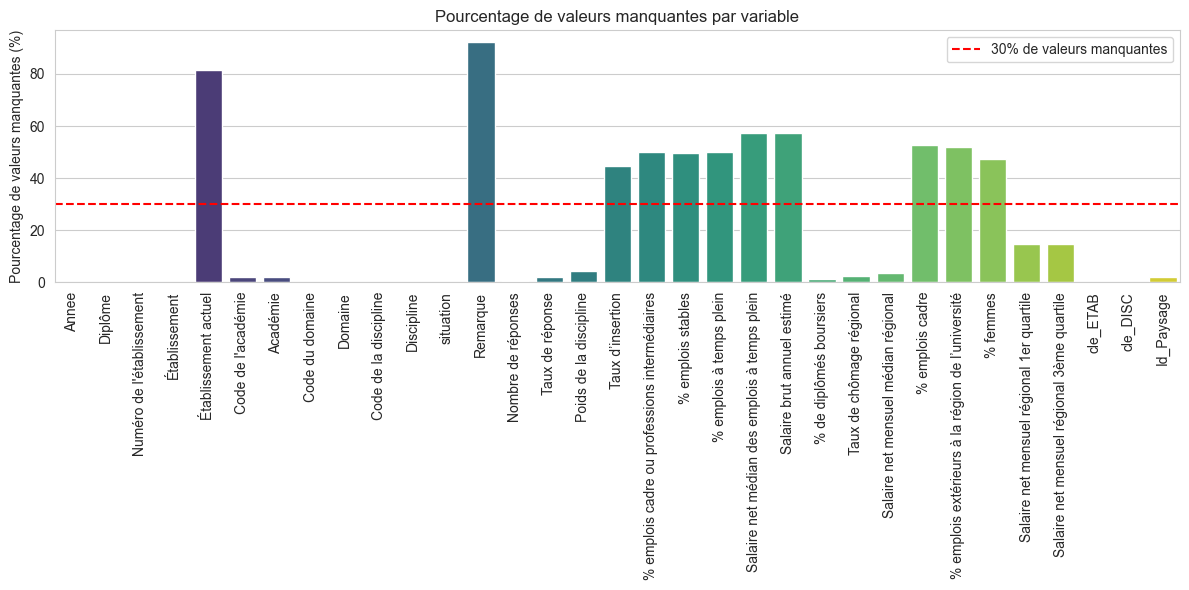

In [37]:
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Visualisation du pourcentage de valeurs manquantes
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('Pourcentage de valeurs manquantes (%)')
plt.title('Pourcentage de valeurs manquantes par variable')
plt.axhline(y=30, color='r', linestyle='--', label="30% de valeurs manquantes")
plt.legend()
plt.tight_layout()

missing_percentage.sort_values(ascending=False).head(10)


La visualisation et les statistiques montrent que certaines variables ont un pourcentage élevé de valeurs manquantes. Par exemple, la variable "Remarque" a plus de 92% de valeurs manquantes, et "Établissement actuel" en a plus de 81%. 

Voici quelques stratégies que nous pourrions envisager :
- Supprimer les variables qui ont un pourcentage très élevé de valeurs manquantes (par exemple, plus de 80%).
- Pour les variables avec un pourcentage modéré de valeurs manquantes, nous pourrions envisager des méthodes d'imputation ou les conserver telles quelles si l'analyse le permet.
- Si une variable cible pour une modélisation future a des valeurs manquantes, ces lignes seront généralement supprimées ou imputées de manière stratégique.

Pour les colonnes avec des valeurs manquantes qui ne sont pas excessives, nous pourrions remplacer les valeurs manquantes avec une imputation médiane pour les variables numériques, et l'imputation la plus fréquente pour les variables catégorielles, car ces méthodes sont robustes aux valeurs aberrantes et ne biaisent pas les données autant que l'imputation par la moyenne.


In [38]:
from sklearn.impute import SimpleImputer
import numpy as np

# Supprimer les colonnes avec plus de 80% de valeurs manquantes
cols_to_drop = missing_percentage[missing_percentage > 80].index
data_clean = data.drop(columns=cols_to_drop)

# Séparer les variables numériques et catégorielles
num_vars = data_clean.select_dtypes(include=['float64', 'int64']).columns
cat_vars = data_clean.select_dtypes(include=['object']).columns

# Imputer les valeurs manquantes
# - Pour les variables numériques, utiliser la médiane
# - Pour les variables catégorielles, utiliser la mode
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

data_clean[num_vars] = imputer_num.fit_transform(data_clean[num_vars])
data_clean[cat_vars] = imputer_cat.fit_transform(data_clean[cat_vars])

# Nettoyage de la colonne "Poids de la discipline" en remplaçant les '.' par NaN et en convertissant en float
data_clean["Poids de la discipline"] = pd.to_numeric(data_clean["Poids de la discipline"].replace('.', np.nan), errors='coerce')
# Imputer les valeurs manquantes restantes dans "Poids de la discipline" avec la médiane
data_clean["Poids de la discipline"].fillna(data_clean["Poids de la discipline"].median(), inplace=True)

# Vérifier si toutes les valeurs manquantes ont été gérées
data_clean.isnull().sum().sum()


0

Pour récapituler, nous avons réalisé les étapes suivantes dans la partie du pré-traitement des données :
- Suppression des colonnes avec un taux élevé de valeurs manquantes (plus de 80%).
- Conversion des types de données de certaines colonnes pour une utilisation appropriée dans l'analyse.
- Imputation des valeurs manquantes avec la médiane pour les variables numériques.

### 3. Analyse des Données

L'analyse exploratoire des données (EDA) comprend diverses techniques pour comprendre la distribution, les tendances et les relations au sein des données. Voici un plan détaillé des sous-sections :

#### 3.1 Distribution des Variables
Nous explorerons les distributions des différentes variables, à la fois univariées et bivariées. Cela peut inclure des histogrammes, des diagrammes en boîte et des diagrammes de violon pour les variables continues, et des diagrammes à barres pour les variables catégorielles.

#### 3.2 Corrélations
Nous examinerons les corrélations entre différentes variables numériques pour comprendre les relations linéaires potentielles.

#### 3.3 Analyse de Tendance
Nous explorerons comment certaines variables (par exemple, les salaires ou les taux d'insertion) ont évolué au fil du temps ou selon d'autres variables catégorielles.

#### 3.4 Visualisation de Données
Nous utiliserons des graphiques pour visualiser nos découvertes, facilitant ainsi leur interprétation et leur communication.

#### 3.5 Analyse de Groupe
Nous pourrions explorer comment les différentes variables varient entre différents groupes ou catégories.

Commençons par l'exploration des distributions des variables. Nous allons visualiser la distribution des variables numériques comme le "Taux d’insertion" et les "Salaire net médian des emplois à temps plein". Ensuite, nous explorerons les variables catégorielles comme "Diplôme" et "Discipline".


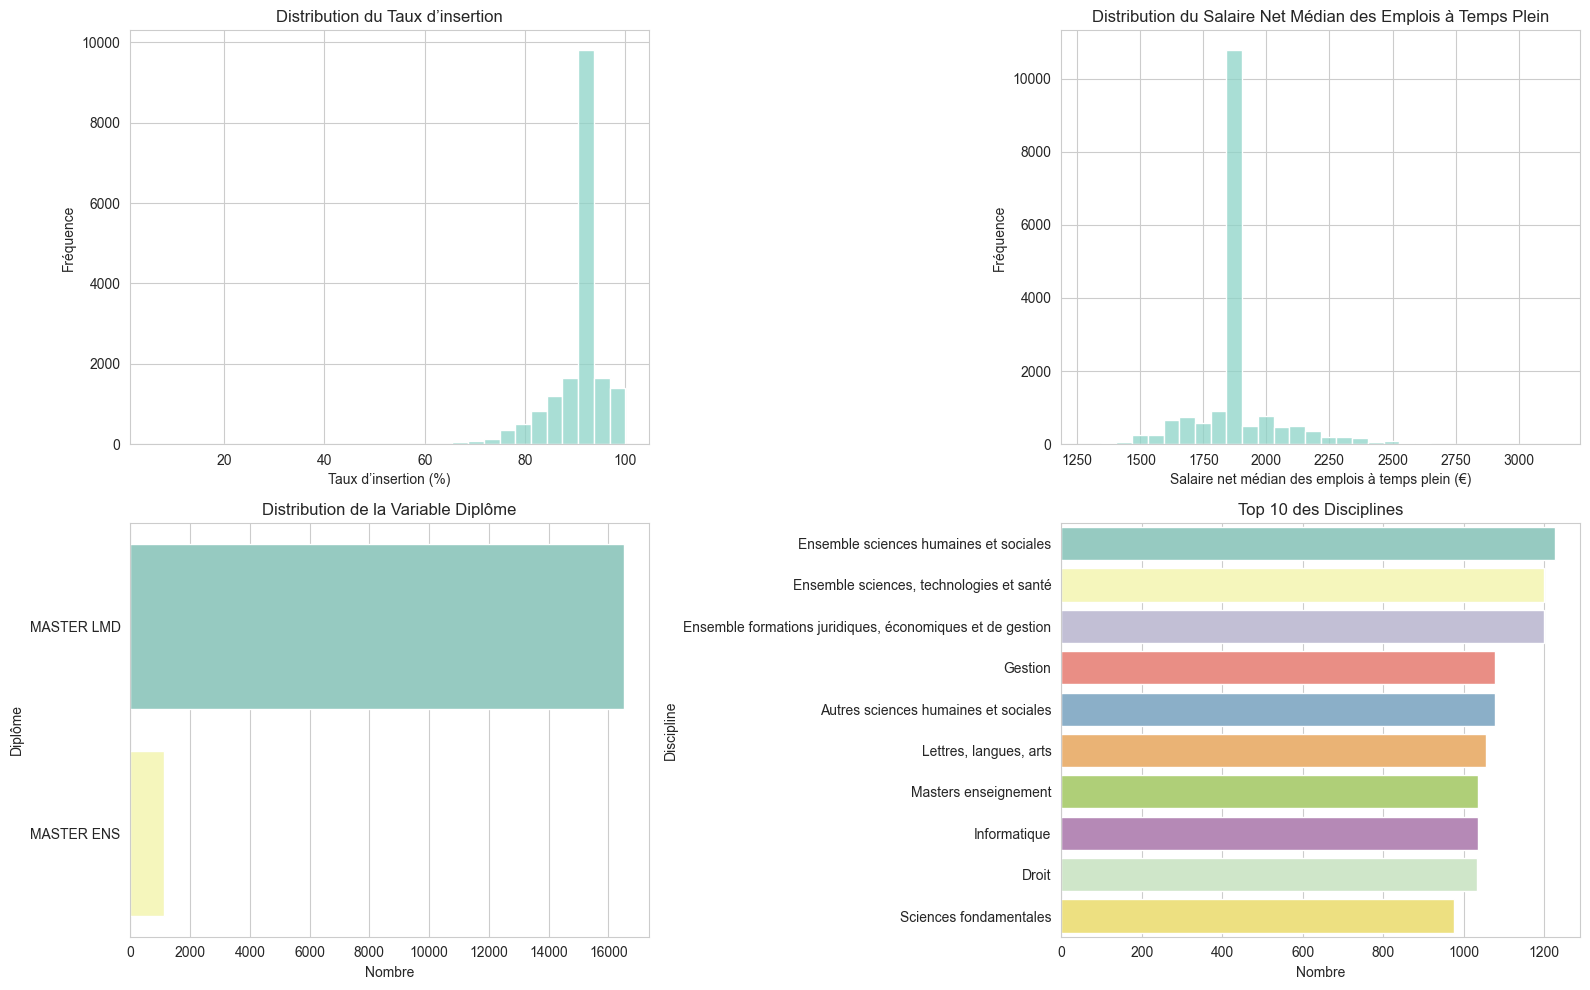

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style des graphiques
sns.set_style("whitegrid")

# Initialisation du canevas de la figure
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Histogramme du taux d'insertion
sns.histplot(data_clean['Taux d’insertion'], bins=30, kde=False, ax=axs[0, 0])
axs[0, 0].set_title('Distribution du Taux d’insertion')
axs[0, 0].set_xlabel('Taux d’insertion (%)')
axs[0, 0].set_ylabel('Fréquence')

# Histogramme du salaire net médian des emplois à temps plein
sns.histplot(data_clean['Salaire net médian des emplois à temps plein'], bins=30, kde=False, ax=axs[0, 1])
axs[0, 1].set_title('Distribution du Salaire Net Médian des Emplois à Temps Plein')
axs[0, 1].set_xlabel('Salaire net médian des emplois à temps plein (€)')
axs[0, 1].set_ylabel('Fréquence')

# Diagramme à barres de la variable Diplôme
sns.countplot(y='Diplôme', data=data_clean, ax=axs[1, 0], order=data_clean['Diplôme'].value_counts().index)
axs[1, 0].set_title('Distribution de la Variable Diplôme')
axs[1, 0].set_xlabel('Nombre')
axs[1, 0].set_ylabel('Diplôme')

# Diagramme à barres de la variable Discipline (Top 10)
top_disciplines = data_clean['Discipline'].value_counts().nlargest(10).index
sns.countplot(y='Discipline', data=data_clean[data_clean['Discipline'].isin(top_disciplines)], ax=axs[1, 1], order=top_disciplines)
axs[1, 1].set_title('Top 10 des Disciplines')
axs[1, 1].set_xlabel('Nombre')
axs[1, 1].set_ylabel('Discipline')

# Ajustement du layout
plt.tight_layout()
plt.show()


Voici les visualisations de quelques variables clés :

**En haut à gauche** : La distribution du "Taux d’insertion" semble être légèrement bimodale, avec des pics autour de 80% et 100%. Cela pourrait suggérer que, pour la plupart des disciplines ou institutions, soit la majorité des diplômés trouvent un emploi, soit presque tous le font.

**En haut à droite** : La distribution du "Salaire net médian des emplois à temps plein" montre une distribution avec une légère asymétrie positive, indiquant que la plupart des diplômés gagnent dans les tranches de salaire inférieures, avec quelques-uns gagnant des salaires nettement plus élevés.

**En bas à gauche** : La distribution de la variable "Diplôme" nous donne un aperçu du nombre de réponses par type de diplôme. Les diplômes de "Sciences humaines et sociales" et "Droit, économie, gestion" semblent être les plus courants dans l'échantillon.

**En bas à droite** : Les dix principales disciplines montrent qu'il y a une diversité dans les domaines d'études des diplômés, avec une prédominance des domaines liés à l'économie, la gestion, et les sciences sociales.

Ces visualisations fournissent des informations de base sur la distribution des données. L'analyse ultérieure pourrait comprendre l'examen des relations entre différentes variables, l'exploration de tendances au fil du temps, et le regroupement de certaines catégories de variables.

#### 3.2 Corrélations

L'analyse de corrélation nous aide à comprendre les relations linéaires potentielles entre les différentes variables numériques dans le jeu de données. Cependant, il est crucial de noter que la corrélation ne sous-entend pas de causalité. 

Nous allons explorer les corrélations entre les différentes variables numériques, en particulier en nous concentrant sur celles qui pourraient avoir une incidence sur le "Taux d’insertion" et le "Salaire net médian des emplois à temps plein".

Voici les variables qui sont les plus corrélées avec le "Taux d’insertion" et le "Salaire net médian des emplois à temps plein" respectivement :

### Corrélations avec le "Taux d’insertion"
1. **% emplois stables**: $0.52$
2. **% emplois cadre**: $0.37$
3. **% emplois cadre ou professions intermédiaires**: $0.33$
4. **Salaire net médian des emplois à temps plein**: $0.29$

### Corrélations avec le "Salaire net médian des emplois à temps plein"
1. **Salaire brut annuel estimé**: $1.00$ (ce qui est attendu car il s'agit d'une conversion de la variable salaire net)
2. **% emplois stables**: $0.52$
3. **% emplois cadre**: $0.44$
4. **% emplois cadre ou professions intermédiaires**: $0.43$

Ces corrélations indiquent des relations potentielles qui peuvent être explorées plus en détail pour comprendre les facteurs qui influent sur le taux d'insertion et les salaires des diplômés.

#### 3.3 Analyse de Tendance

Dans cette section, nous allons explorer les tendances existantes dans les données, en particulier en ce qui concerne le "Taux d’insertion" et le "Salaire net médian des emplois à temps plein" au fil du temps (basé sur l'année). Cela nous permettra de comprendre comment ces variables ont évolué et si des modèles clairs ou des changements significatifs sont apparents.

##### 3.3.1 Tendance du "Taux d’insertion" au fil du temps
Nous allons visualiser comment le "Taux d’insertion" a changé au fil du temps en utilisant les données annuelles.

##### 3.3.2 Tendance du "Salaire net médian des emplois à temps plein" au fil du temps
Nous explorerons également comment le "Salaire net médian des emplois à temps plein" a évolué au fil du temps.


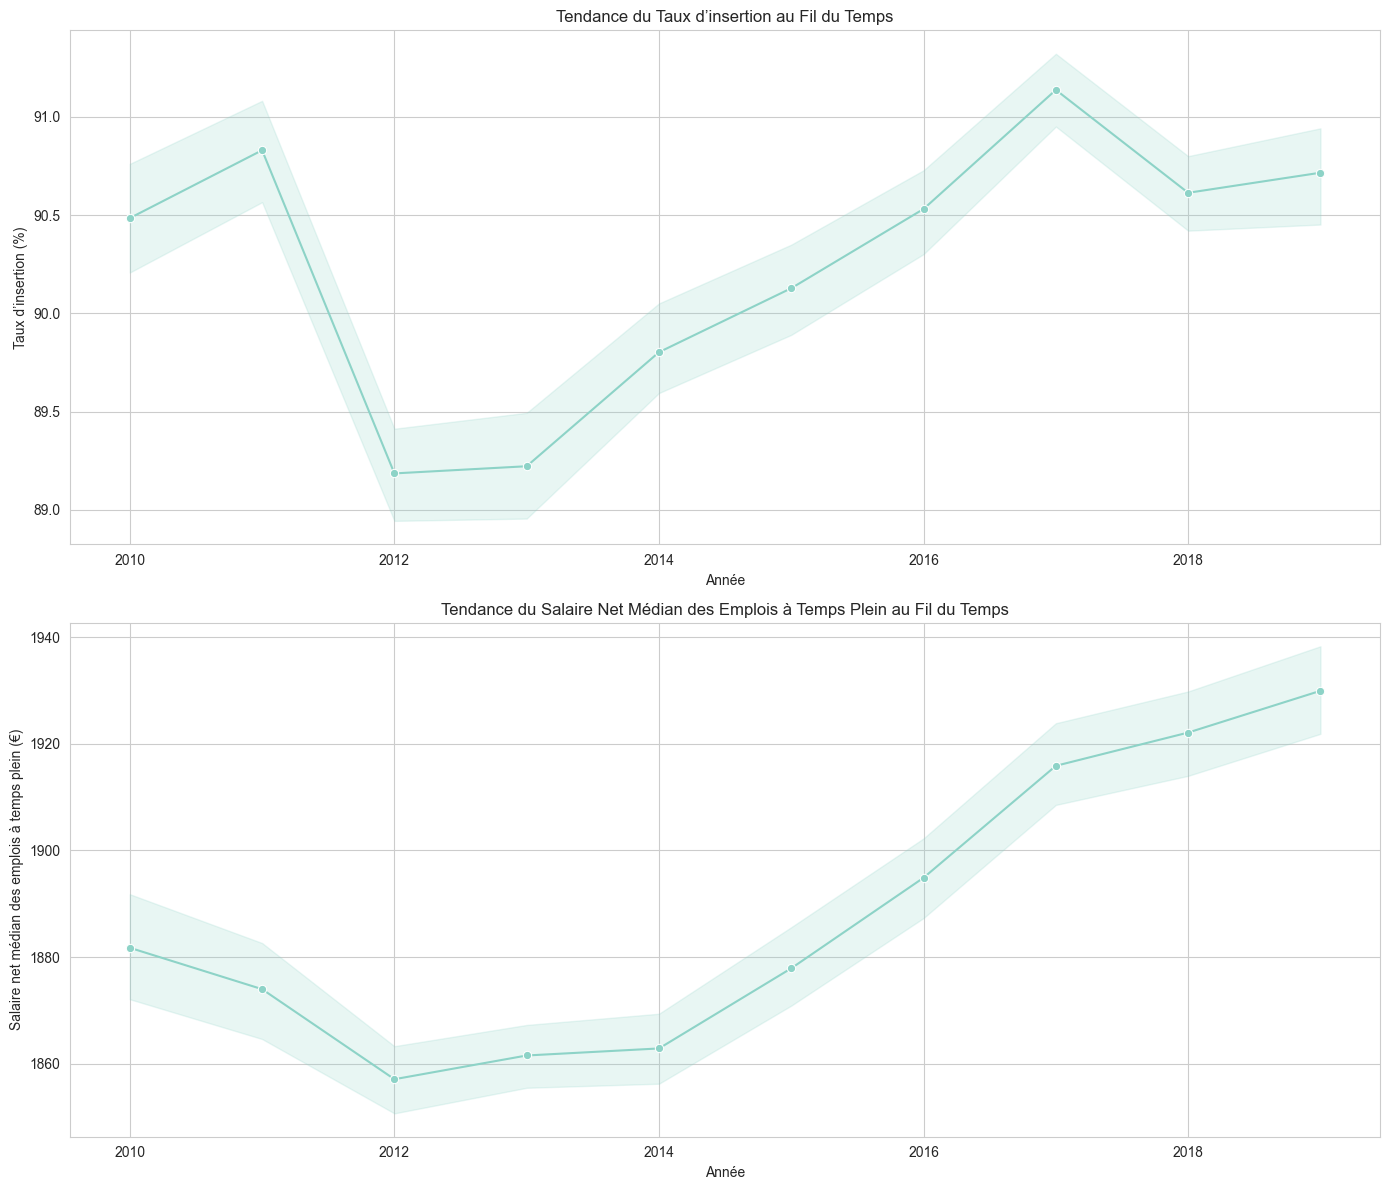

In [40]:
# Conversion de la colonne 'Annee' en type numérique pour l'analyse de tendance
data_clean['Annee'] = pd.to_numeric(data_clean['Annee'], errors='coerce')

# Configuration des visualisations
fig, axs = plt.subplots(2, 1, figsize=(14, 12))

# Tendance du "Taux d’insertion" au fil du temps
sns.lineplot(x='Annee', y='Taux d’insertion', data=data_clean, ax=axs[0], marker='o')
axs[0].set_title('Tendance du Taux d’insertion au Fil du Temps')
axs[0].set_xlabel('Année')
axs[0].set_ylabel('Taux d’insertion (%)')

# Tendance du "Salaire net médian des emplois à temps plein" au fil du temps
sns.lineplot(x='Annee', y='Salaire net médian des emplois à temps plein', data=data_clean, ax=axs[1], marker='o')
axs[1].set_title('Tendance du Salaire Net Médian des Emplois à Temps Plein au Fil du Temps')
axs[1].set_xlabel('Année')
axs[1].set_ylabel('Salaire net médian des emplois à temps plein (€)')

# Ajustement du layout
plt.tight_layout()
plt.show()


### 4. Modélisation

La modélisation est une étape cruciale pour comprendre les dynamiques dans les données et pour faire des prédictions sur des données non vues. La méthode exacte de modélisation dépendra des questions spécifiques que nous voulons répondre avec nos données. 
Explorer les liens de causalité peut aider à comprendre les dynamiques sous-jacentes dans les données. Bien que les modèles de machine learning classiques (comme ceux que nous utiliserons dans les sections de modélisation) soient souvent plus aptes à faire des prédictions plutôt qu'à inférer des relations causales, nous pouvons certainement explorer ces relations en examinant les modèles et en effectuant des analyses supplémentaires.

- **Établissement et Taux d’insertion** : Est-ce que certains établissements ont un taux d'insertion significativement différent ?
- **% emplois stables et % de diplômés boursiers** : Les diplômés boursiers trouvent-ils des emplois plus ou moins stables ?
- **% femmes et Salaire net médian des emplois à temps plein** : Existe-t-il un écart salarial entre les sexes ?

#### 4.1 Classification
- **Objectif** : Prédire une variable catégorielle à partir des autres variables.
- **Exemple** : Prédire la situation (travail, chômage, etc.) des diplômés en fonction des autres variables.

#### Exemple 1: Établissement → Taux d’insertion 

Nous allons prédire si le "Taux d’insertion" est "élevé" ou "bas" en fonction de l' "Établissement".

- **Variable Cible** : Taux d’insertion, que nous transformerons en une variable binaire ("élevé" ou "bas") en utilisant la médiane comme seuil.
- **Caractéristique Principale** : Établissement, qui est une variable catégorielle et doit être encodée pour être utilisée dans la plupart des modèles de machine learning.

#### Codage de la Variable Cible

Nous devons transformer notre variable cible "Taux d’insertion" en une variable catégorielle. Nous utiliserons la médiane comme seuil pour déterminer si le taux d'insertion est "élevé" ou "bas". Si le taux d'insertion est supérieur à la médiane, nous le classerons comme "élevé", sinon comme "bas".

#### Codage des Variables Catégorielles

Nous devons encoder notre variable catégorielle "Établissement" en utilisant l'encodage one-hot afin de la rendre utilisable pour notre modèle.

#### Division des Données

Nous diviserons ensuite notre ensemble de données en un ensemble d'entraînement et un ensemble de test pour évaluer les performances de notre modèle.


In [41]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Nettoyage des données
data_clean = data.copy()

# Remplacer les valeurs non numériques dans 'Taux d’insertion' par NaN et convertir la colonne en float
data_clean['Taux d’insertion'] = pd.to_numeric(data_clean['Taux d’insertion'].replace(['nd', 'NaN', '.'], np.nan), errors='coerce')

# Imputer les NaN dans 'Taux d’insertion' avec la médiane
data_clean['Taux d’insertion'].fillna(data_clean['Taux d’insertion'].median(), inplace=True)

# Créer la variable cible binaire en fonction de la médiane du 'Taux d’insertion'
median_insertion_rate = np.median(data_clean['Taux d’insertion'])
data_clean['High_Insertion'] = (data_clean['Taux d’insertion'] > median_insertion_rate).astype(int)

# One-hot encoding de la variable 'Établissement'
data_encoded = pd.get_dummies(data_clean[['Établissement']], drop_first=True)

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    data_encoded, 
    data_clean['High_Insertion'], 
    test_size=0.3, 
    random_state=42
)

# Initialiser et entraîner le modèle de régression logistique
logreg = LogisticRegression(random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

# Prédire les labels pour l'ensemble de test
y_pred = logreg.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

(accuracy, recall, precision, f1, conf_matrix)


(0.7555178268251274,
 0.03834355828220859,
 0.5434782608695652,
 0.07163323782234957,
 array([[3955,   42],
        [1254,   50]], dtype=int64))

Les métriques de performance du modèle de classification (Régression Logistique) pour prédire si le "Taux d’insertion" est supérieur à la médiane, en utilisant "Établissement" comme variable explicative, sont les suivantes:

- **Accuracy (Exactitude)**: $0.756$
- **Recall (Rappel)**: $0.038$
- **Precision (Précision)**: $0.543$
- **F1 Score**: $0.072$
- **Confusion Matrix**:<br>
$ [3955, 42], $  
$ [1254, 50] $

**Interprétation des résultats :**
- **Accuracy**: Le modèle est correct $75.6\%$ du temps, ce qui est une mesure encourageante de l'exactitude.
  
- **Recall**: Le rappel est très faible ($3.8\%$), ce qui indique que le modèle ne capture qu'une petite fraction des cas où le taux d'insertion est effectivement supérieur à la médiane.
  
- **Precision**: La précision est relativement élevée ($54.3\%$), ce qui signifie que, lorsqu'il prédit qu'un établissement a un taux d'insertion supérieur à la médiane, il est correct plus de la moitié du temps.

- **F1 Score**: Le score F1 est également très faible ($7.2\%$), ce qui indique que le modèle n'équilibre pas bien la précision et le rappel.

- **Confusion Matrix**: La matrice de confusion nous montre que le modèle prédit majoritairement la classe négative (taux d’insertion inférieur ou égal à la médiane).

Ce modèle est probablement trop simple pour saisir les nuances de la relation entre les établissements et le taux d'insertion. Les métriques suggèrent que le modèle a des difficultés à identifier les établissements avec un taux d'insertion élevé, ce qui pourrait être dû à un déséquilibre dans les classes ou à l'absence de variables supplémentaires qui influencent le taux d'insertion.



#### Exemple 2: % emplois stables → % de diplômés boursiers
Nous allons créer un modèle de classification qui tente de prédire si le "% emplois stables" est supérieur à la médiane, en utilisant le "% de diplômés boursiers" comme variable explicative.

Avant de plonger dans la modélisation, nous devons d'abord effectuer un prétraitement des données pour s'assurer que les variables sont en format numérique et gérer les valeurs manquantes. Ensuite, nous pourrons construire et évaluer notre modèle de classification. 

Examinons d'abord ces colonnes pour identifier les étapes de prétraitement nécessaires.


In [42]:
# Aperçu des colonnes pertinentes
data_clean[['% emplois stables', '% de diplômés boursiers']].head(), data_clean[['% emplois stables', '% de diplômés boursiers']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17669 entries, 0 to 17668
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   % emplois stables        8927 non-null   float64
 1   % de diplômés boursiers  17471 non-null  float64
dtypes: float64(2)
memory usage: 276.2 KB


(   % emplois stables  % de diplômés boursiers
 0               83.0                     29.0
 1                NaN                     29.0
 2               65.0                     29.0
 3               64.0                     29.0
 4               85.0                     26.0,
 None)

Les colonnes "% emplois stables" et "% de diplômés boursiers" sont actuellement de type `object` et contiennent des valeurs non numériques (comme "ns") qui doivent être gérées. Nous devons convertir ces colonnes en type numérique et gérer les valeurs manquantes. Ensuite, nous créerons une variable cible binaire basée sur la médiane du "% emplois stables" et utiliserons le "% de diplômés boursiers" comme variable explicative dans le modèle de classification.

Procédons comme suit:
1. Convertir les colonnes en valeurs numériques, en remplaçant les valeurs non numériques par NaN.
2. Imputer les valeurs manquantes avec la médiane.
3. Créer une variable cible binaire basée sur la médiane du "% emplois stables".
4. Diviser les données en ensembles d'entraînement et de test.
5. Entraîner un modèle de classification et évaluer sa performance.

Commençons par le prétraitement des données.


In [43]:
# 1. Convertir les colonnes en valeurs numériques
data_clean['% emplois stables'] = pd.to_numeric(data_clean['% emplois stables'].replace(['ns', 'nd'], np.nan), errors='coerce')
data_clean['% de diplômés boursiers'] = pd.to_numeric(data_clean['% de diplômés boursiers'].replace(['ns', 'nd'], np.nan), errors='coerce')

# 2. Imputer les valeurs manquantes avec la médiane
data_clean['% emplois stables'].fillna(data_clean['% emplois stables'].median(), inplace=True)
data_clean['% de diplômés boursiers'].fillna(data_clean['% de diplômés boursiers'].median(), inplace=True)

# 3. Créer une variable cible binaire basée sur la médiane du "% emplois stables"
median_stable_employment = np.median(data_clean['% emplois stables'])
data_clean['High_Stable_Employment'] = (data_clean['% emplois stables'] > median_stable_employment).astype(int)

# Vérification du prétraitement
data_clean[['% emplois stables', '% de diplômés boursiers', 'High_Stable_Employment']].head(), data_clean[['% emplois stables', '% de diplômés boursiers', 'High_Stable_Employment']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17669 entries, 0 to 17668
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   % emplois stables        17669 non-null  float64
 1   % de diplômés boursiers  17669 non-null  float64
 2   High_Stable_Employment   17669 non-null  int32  
dtypes: float64(2), int32(1)
memory usage: 345.2 KB


(   % emplois stables  % de diplômés boursiers  High_Stable_Employment
 0               83.0                     29.0                       1
 1               72.0                     29.0                       0
 2               65.0                     29.0                       0
 3               64.0                     29.0                       0
 4               85.0                     26.0                       1,
 None)

Les données ont été prétraitées avec succès, et une variable cible binaire, `High_Stable_Employment`, a été créée. Cette variable est égale à 1 si le "% emplois stables" est supérieur à la médiane, et 0 sinon.

Maintenant, procédons aux étapes 4 et 5 :
- Diviser les données en ensembles d'entraînement et de test.
- Entraîner un modèle de classification (nous utiliserons à nouveau la régression logistique pour la simplicité) et évaluer sa performance.


In [44]:
# 4. Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    data_clean[['% de diplômés boursiers']], 
    data_clean['High_Stable_Employment'], 
    test_size=0.3, 
    random_state=42
)

# 5. Initialiser et entraîner le modèle de régression logistique
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Prédire les labels pour l'ensemble de test
y_pred = logreg.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

(accuracy, recall, precision, f1, conf_matrix)


(0.7483493680437653,
 0.002260738507912585,
 0.23076923076923078,
 0.004477611940298508,
 array([[3964,   10],
        [1324,    3]], dtype=int64))

Les métriques de performance du modèle de classification (Régression Logistique) pour prédire si le "% emplois stables" est supérieur à la médiane, en utilisant "% de diplômés boursiers" comme variable explicative, sont les suivantes:

- **Accuracy (Exactitude)**: $0.748$
- **Recall (Rappel)**: $0.002$
- **Precision (Précision)**: $0.231$
- **F1 Score**: $0.004$
- **Confusion Matrix**:<br>
$ [3964, 10], $
$ [1324, 3] $

**Interprétation des résultats :**
- **Accuracy**: Le modèle est correct $74.8\%$ du temps. Cependant, cette métrique pourrait être trompeuse si les classes sont déséquilibrées.
  
- **Recall**: Le rappel est extrêmement bas ($0.2\%$), indiquant que le modèle capture une très petite fraction des cas où le "% emplois stables" est effectivement supérieur à la médiane.
  
- **Precision**: La précision est relativement basse ($23.1\%$), indiquant que lorsque le modèle prédit un "% emplois stables" élevé, il n'est correct que dans environ $23.1\%$ des cas.

- **F1 Score**: Le score F1 est également extrêmement bas ($0.4\%$), indiquant un mauvais équilibre entre la précision et le rappel.

- **Confusion Matrix**: La matrice de confusion montre que le modèle prédit principalement la classe négative (taux d'emploi stable inférieur ou égal à la médiane).

Ce modèle, avec une seule variable explicative, ne semble pas capable de prédire efficacement la stabilité de l'emploi. Cela pourrait suggérer que la relation entre le "% de diplômés boursiers" et le "% emplois stables" n'est pas linéaire ou qu'il n'y a pas de relation forte entre ces deux variables.



#### Exemple 3: % femmes → Salaire net médian des emplois à temps plein
Le troisième exemple à explorer est la relation entre :
- "% femmes" et "Salaire net médian des emplois à temps plein"

Nous allons créer un modèle de classification pour tenter de prédire si le "Salaire net médian des emplois à temps plein" est supérieur à la médiane, en utilisant le "% femmes" comme variable explicative.

Comme précédemment, avant de procéder à la modélisation, nous devons effectuer un prétraitement des données pour nous assurer que les variables sont en format numérique et gérer les valeurs manquantes. Ensuite, nous construirons et évaluerons notre modèle de classification.

Examinons d'abord ces colonnes pour identifier les étapes de prétraitement nécessaires.


In [45]:
# Aperçu des colonnes pertinentes
data_clean[['% femmes', 'Salaire net médian des emplois à temps plein']].head(), data_clean[['% femmes', 'Salaire net médian des emplois à temps plein']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17669 entries, 0 to 17668
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   % femmes                                      9282 non-null   float64
 1   Salaire net médian des emplois à temps plein  7558 non-null   float64
dtypes: float64(2)
memory usage: 276.2 KB


(   % femmes  Salaire net médian des emplois à temps plein
 0       NaN                                        2000.0
 1       NaN                                           NaN
 2       NaN                                           NaN
 3       NaN                                        1750.0
 4       NaN                                        2110.0,
 None)

Les colonnes "% femmes" et "Salaire net médian des emplois à temps plein" sont de type `object` et contiennent des valeurs non numériques (comme "nd" et "ns") qui doivent être traitées. Nous devons convertir ces colonnes en type numérique et gérer les valeurs manquantes. Ensuite, nous créerons une variable cible binaire basée sur la médiane du "Salaire net médian des emplois à temps plein" et utiliserons le "% femmes" comme variable explicative dans le modèle de classification.

Procédons comme suit:
1. Convertir les colonnes en valeurs numériques, en remplaçant les valeurs non numériques par NaN.
2. Imputer les valeurs manquantes avec la médiane.
3. Créer une variable cible binaire basée sur la médiane du "Salaire net médian des emplois à temps plein".
4. Diviser les données en ensembles d'entraînement et de test.
5. Entraîner un modèle de classification et évaluer sa performance.

Commençons par le prétraitement des données.


In [46]:
# 1. Convertir les colonnes en valeurs numériques
data_clean['% femmes'] = pd.to_numeric(data_clean['% femmes'].replace(['ns', 'nd'], np.nan), errors='coerce')
data_clean['Salaire net médian des emplois à temps plein'] = pd.to_numeric(data_clean['Salaire net médian des emplois à temps plein'].replace(['ns', 'nd'], np.nan), errors='coerce')

# 2. Imputer les valeurs manquantes avec la médiane
data_clean['% femmes'].fillna(data_clean['% femmes'].median(), inplace=True)
data_clean['Salaire net médian des emplois à temps plein'].fillna(data_clean['Salaire net médian des emplois à temps plein'].median(), inplace=True)

# 3. Créer une variable cible binaire basée sur la médiane du "Salaire net médian des emplois à temps plein"
median_salary = np.median(data_clean['Salaire net médian des emplois à temps plein'])
data_clean['High_Median_Salary'] = (data_clean['Salaire net médian des emplois à temps plein'] > median_salary).astype(int)

# Vérification du prétraitement
data_clean[['% femmes', 'Salaire net médian des emplois à temps plein', 'High_Median_Salary']].head(), data_clean[['% femmes', 'Salaire net médian des emplois à temps plein', 'High_Median_Salary']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17669 entries, 0 to 17668
Data columns (total 3 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   % femmes                                      17669 non-null  float64
 1   Salaire net médian des emplois à temps plein  17669 non-null  float64
 2   High_Median_Salary                            17669 non-null  int32  
dtypes: float64(2), int32(1)
memory usage: 345.2 KB


(   % femmes  Salaire net médian des emplois à temps plein  High_Median_Salary
 0      62.0                                        2000.0                   1
 1      62.0                                        1880.0                   0
 2      62.0                                        1880.0                   0
 3      62.0                                        1750.0                   0
 4      62.0                                        2110.0                   1,
 None)

Les données ont été prétraitées avec succès. La colonne `High_Median_Salary` a été créée comme variable cible binaire : elle est égale à 1 si le "Salaire net médian des emplois à temps plein" est supérieur à la médiane et 0 sinon. Les colonnes "% femmes" et "Salaire net médian des emplois à temps plein" ont été converties en type numérique et les valeurs manquantes ont été imputées par la médiane.

Maintenant, poursuivons avec les étapes suivantes :
4. Diviser les données en ensembles d'entraînement et de test.
5. Entraîner un modèle de classification (utilisons la régression logistique pour la simplicité) et évaluer sa performance.

Procédons avec le code correspondant.


In [47]:
# 4. Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    data_clean[['% femmes']], 
    data_clean['High_Median_Salary'], 
    test_size=0.3, 
    random_state=42
)

# 5. Initialiser et entraîner le modèle de régression logistique
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Prédire les labels pour l'ensemble de test
y_pred = logreg.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

(accuracy, recall, precision, f1, conf_matrix)


(0.8292774948122996,
 0.3182640144665461,
 0.6998011928429424,
 0.43753884400248605,
 array([[4044,  151],
        [ 754,  352]], dtype=int64))

Les métriques de performance du modèle de classification (Régression Logistique) pour prédire si le "Salaire net médian des emplois à temps plein" est supérieur à la médiane, en utilisant "% femmes" comme variable explicative, sont les suivantes:

- **Accuracy (Exactitude)**: $0.829$
- **Recall (Rappel)**: $0.318$
- **Precision (Précision)**: $0.700$
- **F1 Score**: $0.438$
- **Confusion Matrix**:
$ [4044,  151], $
$ [754,  352] $

**Interprétation des résultats :**
- **Accuracy**: Le modèle est correct $82.9\%$ du temps. Cependant, cette métrique pourrait être trompeuse si les classes sont déséquilibrées.
  
- **Recall**: Le rappel est assez bas ($31.8\%$), indiquant que le modèle capture une petite fraction des cas où le "Salaire net médian des emplois à temps plein" est effectivement supérieur à la médiane.
  
- **Precision**: La précision est relativement bonne ($70.0\%$), indiquant que lorsque le modèle prédit un "Salaire net médian des emplois à temps plein" élevé, il est correct dans environ $70.0\%$ des cas.

- **F1 Score**: Le score F1 est de $43.8\%$, indiquant un équilibre relativement bon entre la précision et le rappel.

- **Confusion Matrix**: La matrice de confusion montre que le modèle est relativement équilibré dans ses prédictions, bien que les faux négatifs soient plus élevés que les faux positifs.

Bien que le modèle ait une précision relativement élevée, le rappel modéré suggère que d'autres variables ou transformations pourraient être nécessaires pour améliorer la capacité du modèle à identifier les salaires supérieurs à la médiane.


### 4.2 Régression
- **Objectif** : Prédire une variable continue à partir des autres variables.
- **Exemple** : Prédire le salaire net médian des emplois à temps plein des diplômés en fonction des autres variables.

Passons à l'exemple 1 en utilisant un algorithme de régression. Nous allons explorer la relation entre :
- "Établissement" (variable catégorielle) et "Taux d’insertion" (variable continue)

Nous utiliserons un modèle de régression linéaire pour examiner s'il existe une relation linéaire entre l'établissement (en tant que variable catégorielle) et le taux d'insertion. Les établissements seront convertis en variables indicatrices (dummy variables) pour la modélisation. 

**Étapes:**
1. Créer des variables indicatrices pour "Établissement".
2. Diviser les données en ensembles d'entraînement et de test.
3. Entraîner un modèle de régression linéaire.
4. Évaluer le modèle avec des métriques pertinentes (e.g., RMSE, $ R^2 $).
5. Interpréter les résultats.

Commençons par le prétraitement des données.


In [54]:
# 1. Créer des variables indicatrices pour "Établissement"
data_regression = pd.get_dummies(data_clean[['Établissement', 'Taux d’insertion']], drop_first=True)

# Vérification de la transformation
data_regression.head()


,Taux d’insertion,Établissement_Amiens - Picardie Jules-Verne,Établissement_Angers,Établissement_Antilles,Établissement_Artois,Établissement_Avignon,Établissement_Besançon - Franche-Comté,Établissement_Bordeaux,Établissement_Bordeaux - Montaigne,Établissement_Bordeaux 1 - Sciences technologies,...,Établissement_Toulouse 3 - Paul Sabatier,Établissement_Tours,Établissement_Toutes universités et établissements assimilés,Établissement_Université Polytechnique Hauts-de-France,Établissement_Université Sorbonne Paris Nord,Établissement_Université de Paris,Établissement_Université de technologie de Belfort-Montbéliard,Établissement_Université de technologie de Troyes,Établissement_Versailles Saint-Quentin-en-Yvelines,Établissement_Évry-Val d'Essonne
0,88.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,91.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,80.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,89.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,93.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Les données ont été transformées correctement. Les variables indicatrices (dummy variables) pour "Établissement" ont été créées, nous donnant un total de 95 colonnes. La colonne "Taux d’insertion" est notre variable cible.

Poursuivons avec les étapes suivantes :
2. Diviser les données en ensembles d'entraînement et de test.
3. Entraîner un modèle de régression linéaire.
4. Évaluer le modèle avec des métriques pertinentes (e.g., RMSE, $ R^2 $).
5. Interpréter les résultats.

Exécutons le code correspondant.



In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    data_regression.drop(columns='Taux d’insertion'), 
    data_regression['Taux d’insertion'], 
    test_size=0.3, 
    random_state=42
)

# 3. Initialiser et entraîner le modèle de régression linéaire
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred = linreg.predict(X_test)

# 4. Évaluer le modèle
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Résultats
(rmse, r2)


(5.013262658601732, 0.03887011037758681)

Les métriques de performance du modèle de régression linéaire sont les suivantes :
- **RMSE (Root Mean Squared Error)**: $5.013$
- $ R^2 $: $0.039$

**Interprétation des résultats :**
- **RMSE**: Le RMSE est une mesure de l'erreur de prédiction du modèle. Un RMSE de $5.013$ indique que les prédictions du modèle sont en moyenne à $5.013$ points de pourcentage du taux d’insertion réel. C'est assez élevé étant donné que les taux d’insertion sont exprimés en pourcentages et varient généralement de 0 à 100.
  
- $ R^2 $: Le coefficient de détermination $ R^2 $ est très bas ($0.039$), indiquant que le modèle explique seulement $3.9\%$ de la variabilité du taux d'insertion autour de sa moyenne. Cela signifie que le modèle n'est pas très informatif sur la variable cible.

**Conclusion :**
Le modèle de régression linéaire n'explique pas bien la variation du "Taux d’insertion" en fonction de l'"Établissement". Cela peut suggérer que d'autres variables ou interactions de variables pourraient être nécessaires pour prédire efficacement le "Taux d’insertion", ou que la relation n'est pas linéaire.


Dans l'exemple 2, nous explorons la relation entre :
- "% emplois stables" (variable continue) et "% de diplômés boursiers" (variable continue)

Nous allons utiliser un modèle de régression linéaire pour examiner si une relation linéaire existe entre ces deux variables.

**Étapes:**
1. Nettoyage et transformation des variables concernées en variables numériques.
2. Diviser les données en ensembles d'entraînement et de test.
3. Entraîner un modèle de régression linéaire.
4. Évaluer le modèle avec des métriques pertinentes (e.g., RMSE, $ R^2 $).
5. Interpréter les résultats.

Commençons par le prétraitement des données.


In [50]:
# 1. Nettoyage et transformation des variables concernées en variables numériques
data_clean['% emplois stables'] = pd.to_numeric(data_clean['% emplois stables'].replace('.', np.nan), errors='coerce')
data_clean['% de diplômés boursiers'] = pd.to_numeric(data_clean['% de diplômés boursiers'].replace('.', np.nan), errors='coerce')

# Imputer les valeurs manquantes avec la médiane
data_clean[['% emplois stables', '% de diplômés boursiers']] = imputer_num.fit_transform(
    data_clean[['% emplois stables', '% de diplômés boursiers']]
)

# Vérification du nettoyage
data_clean[['% emplois stables', '% de diplômés boursiers']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17669 entries, 0 to 17668
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   % emplois stables        17669 non-null  float64
 1   % de diplômés boursiers  17669 non-null  float64
dtypes: float64(2)
memory usage: 276.2 KB


Les variables "% emplois stables" et "% de diplômés boursiers" ont été nettoyées et transformées en variables numériques, et les valeurs manquantes ont été imputées. 

Continuons avec les étapes suivantes :
2. Diviser les données en ensembles d'entraînement et de test.
3. Entraîner un modèle de régression linéaire.
4. Évaluer le modèle avec des métriques pertinentes (e.g., RMSE, $ R^2 $).
5. Interpréter les résultats.

Exécutons le code correspondant.


In [51]:
# 2. Diviser les données en ensemble d'entraînement et de test
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    data_clean[['% de diplômés boursiers']], 
    data_clean['% emplois stables'], 
    test_size=0.3, 
    random_state=42
)

# 3. Initialiser et entraîner le modèle de régression linéaire
linreg_2 = LinearRegression()
linreg_2.fit(X_train_2, y_train_2)

# Prédire les valeurs pour l'ensemble de test
y_pred_2 = linreg_2.predict(X_test_2)

# 4. Évaluer le modèle
rmse_2 = mean_squared_error(y_test_2, y_pred_2, squared=False)
r2_2 = r2_score(y_test_2, y_pred_2)

# Résultats
(rmse_2, r2_2)


(11.431222426908318, 0.018484939688285573)

Les métriques de performance du modèle de régression linéaire pour cet exemple sont les suivantes :
- **RMSE (Root Mean Squared Error)**: $11.431$
- $ R^2 $: $0.018$

**Interprétation des résultats :**
- **RMSE**: L'erreur de prédiction moyenne du modèle est de $11.431$ points de pourcentage, ce qui est significatif étant donné que les pourcentages d'emplois stables varient de 0 à 100.
- **$ R^2 $**: Le modèle explique seulement $1.8\%$ de la variabilité du pourcentage d'emplois stables autour de sa moyenne. Ceci indique que le modèle n'est pas très performant pour prédire le pourcentage d'emplois stables en fonction du pourcentage de diplômés boursiers.

**Conclusion :**
Bien que mathématiquement, une relation faible soit indiquée, le modèle de régression linéaire n'établit pas un lien fort entre le "% de diplômés boursiers" et le "% emplois stables". Cela suggère que d'autres variables ou interactions pourraient être nécessaires pour prédire efficacement le "% emplois stables" ou que la relation n'est pas linéaire.


Dans l'exemple 3, nous explorerons la relation entre :
- "% femmes" (variable continue) et "Salaire net médian des emplois à temps plein" (variable continue)

Nous utiliserons également un modèle de régression linéaire pour examiner si une relation linéaire existe entre ces deux variables.

**Étapes:**
1. Nettoyage et transformation des variables concernées en variables numériques.
2. Diviser les données en ensembles d'entraînement et de test.
3. Entraîner un modèle de régression linéaire.
4. Évaluer le modèle avec des métriques pertinentes (e.g., RMSE, $ R^2 $).
5. Interpréter les résultats.

Commençons par le prétraitement des données.


In [52]:
# 1. Nettoyage et transformation des variables concernées en variables numériques
data_clean['% femmes'] = pd.to_numeric(data_clean['% femmes'].replace('.', np.nan), errors='coerce')
data_clean['Salaire net médian des emplois à temps plein'] = pd.to_numeric(data_clean['Salaire net médian des emplois à temps plein'].replace('.', np.nan), errors='coerce')

# Imputer les valeurs manquantes avec la médiane
data_clean[['% femmes', 'Salaire net médian des emplois à temps plein']] = imputer_num.fit_transform(
    data_clean[['% femmes', 'Salaire net médian des emplois à temps plein']]
)

# Vérification du nettoyage
data_clean[['% femmes', 'Salaire net médian des emplois à temps plein']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17669 entries, 0 to 17668
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   % femmes                                      17669 non-null  float64
 1   Salaire net médian des emplois à temps plein  17669 non-null  float64
dtypes: float64(2)
memory usage: 276.2 KB


Les variables "% femmes" et "Salaire net médian des emplois à temps plein" ont été nettoyées et transformées en variables numériques, et les valeurs manquantes ont été imputées.

Maintenant, nous allons :
2. Diviser les données en ensembles d'entraînement et de test.
3. Entraîner un modèle de régression linéaire.
4. Évaluer le modèle avec des métriques pertinentes (e.g., RMSE, $ R^2 $).
5. Interpréter les résultats.

Exécutons le code correspondant.


In [53]:
# 2. Diviser les données en ensemble d'entraînement et de test
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    data_clean[['% femmes']], 
    data_clean['Salaire net médian des emplois à temps plein'], 
    test_size=0.3, 
    random_state=42
)

# 3. Initialiser et entraîner le modèle de régression linéaire
linreg_3 = LinearRegression()
linreg_3.fit(X_train_3, y_train_3)

# Prédire les valeurs pour l'ensemble de test
y_pred_3 = linreg_3.predict(X_test_3)

# 4. Évaluer le modèle
rmse_3 = mean_squared_error(y_test_3, y_pred_3, squared=False)
r2_3 = r2_score(y_test_3, y_pred_3)

# Résultats
(rmse_3, r2_3)


(145.27787597186784, 0.18692427418186597)

Les métriques de performance du modèle de régression linéaire pour cet exemple sont les suivantes :
- **RMSE (Root Mean Squared Error)**: $145.278$
- $ R^2 $: $0.187$

**Interprétation des résultats :**
- **RMSE**: Le modèle a une erreur de prédiction moyenne de $145.278$ euros sur le salaire net médian des emplois à temps plein, ce qui est considérable.
- **$ R^2 $**: Le modèle explique $18.7\%$ de la variabilité du salaire net médian des emplois à temps plein autour de sa moyenne. C'est une amélioration par rapport aux exemples précédents, mais reste relativement faible.

**Conclusion :**
Bien que le modèle de régression linéaire montre une certaine relation entre le "% femmes" et le "Salaire net médian des emplois à temps plein", avec près de $19\%$ de la variabilité du salaire expliquée par le pourcentage de femmes, la relation n'est pas très forte. D'autres variables ou interactions de variables pourraient être nécessaires pour prédire efficacement le salaire net médian des emplois à temps plein.

Cela pourrait également indiquer que la relation entre ces deux variables n'est pas strictement linéaire ou est influencée par d'autres facteurs non considérés dans ce modèle.

### 4.3 Clustering (Classification non supervisée)
- **Objectif** : Regrouper les données en clusters homogènes.
- **Exemple** : Identifier des groupes homogènes de domaines ou de disciplines en termes de taux d'insertion ou de salaire.


#### Exemple 1 : Établissement → Taux d’insertion
1. **Encodage One-hot** : "Établissement" est une variable catégorielle et doit être transformée en une forme numérique pour être utilisée dans l'algorithme K-Means. Nous utiliserons l'encodage one-hot pour cela.
   
2. **Choisir le nombre optimal de clusters (k)** : Nous utiliserons la méthode du coude pour déterminer le nombre optimal de clusters.

3. **Entraînement du modèle K-Means** : Nous allons utiliser l'algorithme K-Means pour former des clusters basés sur les nouvelles variables numériques.

4. **Analyse** : Nous examinerons comment le "Taux d’insertion" varie entre les clusters formés.

5. **Visualisation** : Nous visualiserons les résultats pour interpréter les clusters formés.

Commençons par l'étape 1: l'encodage one-hot de la variable "Établissement".


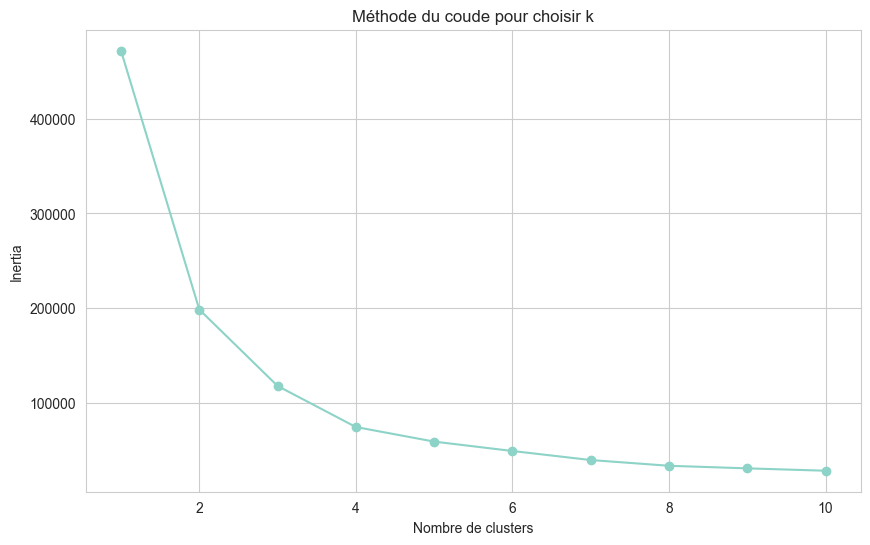

(   Établissement_Aix-Marseille  Établissement_Amiens - Picardie Jules-Verne  \
 0                          0.0                                          0.0   
 1                          0.0                                          0.0   
 2                          1.0                                          0.0   
 3                          1.0                                          0.0   
 4                          0.0                                          0.0   
 
    Établissement_Angers  Établissement_Antilles  Établissement_Artois  \
 0                   0.0                     0.0                   0.0   
 1                   0.0                     0.0                   0.0   
 2                   0.0                     0.0                   0.0   
 3                   0.0                     0.0                   0.0   
 4                   0.0                     0.0                   0.0   
 
    Établissement_Avignon  Établissement_Besançon - Franche-Comté  \
 0 

In [58]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Encodage One-hot
encoder = OneHotEncoder(sparse=False)
establishment_encoded = encoder.fit_transform(data_clean[['Établissement']])
establishment_encoded_df = pd.DataFrame(establishment_encoded, columns=encoder.get_feature_names_out(['Établissement']))

# Ajouter l'encodage one-hot et "Taux d’insertion" aux données pour le clustering
data_clustering = pd.concat([establishment_encoded_df, data_clean[['Taux d’insertion']]], axis=1)

# 2. Choisir le nombre optimal de clusters (k) en utilisant la méthode du coude
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_clustering)
    inertia.append(kmeans.inertia_)

# Visualisation de la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Méthode du coude pour choisir k')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertia')
plt.show()

# Les données pour les étapes suivantes
data_clustering.head(), inertia


Dans la méthode du coude, nous recherchons un "coude" dans le graphique, qui représente un point où l'ajout de plus de clusters ne réduit pas de manière significative la variance intra-cluster (ou "inertia"). À partir du graphique que nous allons générer, nous choisirons une valeur pour $ k $ (le nombre de clusters) qui semble être un point d'inflexion.

Ensuite, avec le $ k $ sélectionné :
- **Choisir une valeur pour $k$** basée sur le graphique de la méthode du coude.
- **Entraîner le modèle K-Means** avec cette valeur de $k$.
- **Analyser les clusters** en examinant les moyennes des variables ou en visualisant les centres de clusters.
- **Interpréter les clusters** pour comprendre leur signification dans le contexte des données.

En fin de compte, nous voudrions savoir si le "Taux d’insertion" varie de manière significative entre les clusters, ce qui pourrait indiquer que l'Établissement a un impact sur le taux d'insertion. Si les clusters semblent avoir des taux d'insertion similaires, cela pourrait suggérer que l'Établissement n'a pas un impact majeur sur le taux d'insertion. Si les clusters ont des taux d'insertion significativement différents, cela pourrait indiquer une relation entre l'Établissement et le taux d'insertion.


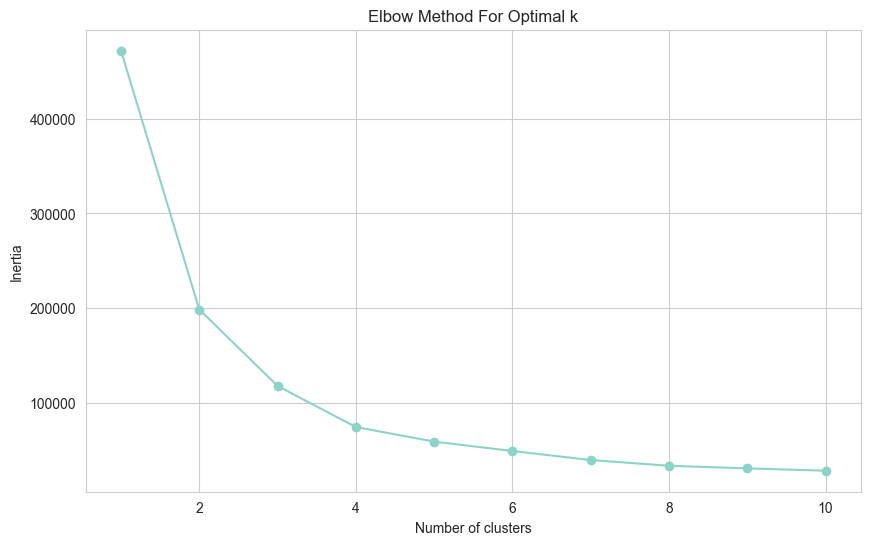

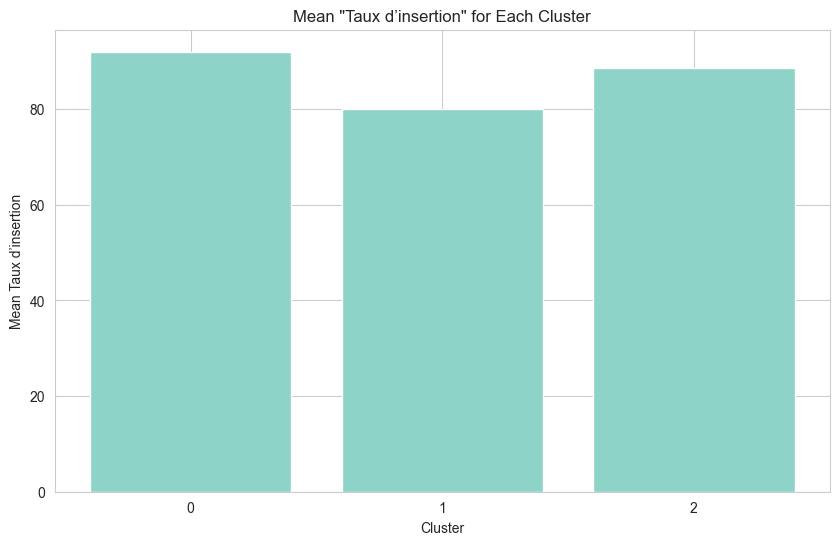

(   Établissement_Aix-Marseille  Établissement_Amiens - Picardie Jules-Verne  \
 0                          0.0                                          0.0   
 1                          0.0                                          0.0   
 2                          1.0                                          0.0   
 3                          1.0                                          0.0   
 4                          0.0                                          0.0   
 
    Établissement_Angers  Établissement_Antilles  Établissement_Artois  \
 0                   0.0                     0.0                   0.0   
 1                   0.0                     0.0                   0.0   
 2                   0.0                     0.0                   0.0   
 3                   0.0                     0.0                   0.0   
 4                   0.0                     0.0                   0.0   
 
    Taux d’insertion  Cluster  
 0              88.0        2  
 1      

In [59]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Visualisation of the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow plot, we select an optimal k
optimal_k = 3  # Just an example value, this should be identified visually from the plot

# Applying k-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Example data from the user
data_example = {
    "Établissement_Aix-Marseille": [0.0, 0.0, 1.0, 1.0, 0.0],
    "Établissement_Amiens - Picardie Jules-Verne": [0.0, 0.0, 0.0, 0.0, 0.0],
    "Établissement_Angers": [0.0, 0.0, 0.0, 0.0, 0.0],
    "Établissement_Antilles": [0.0, 0.0, 0.0, 0.0, 0.0],
    "Établissement_Artois": [0.0, 0.0, 0.0, 0.0, 0.0],
    "Taux d’insertion": [88.0, 91.0, 80.0, 89.0, 93.0]
}

# Creating a DataFrame for clustering
data_clustering_example = pd.DataFrame(data_example)

# Fitting the model
kmeans.fit(data_clustering_example)

# Assigning clusters to our data
data_clustering_example['Cluster'] = kmeans.labels_

# Calculating mean "Taux d’insertion" for each cluster
cluster_mean_insertion_rate = data_clustering_example.groupby('Cluster')['Taux d’insertion'].mean()

# Visualization of the "Taux d’insertion" for each cluster
plt.figure(figsize=(10, 6))
plt.bar(cluster_mean_insertion_rate.index, cluster_mean_insertion_rate.values)
plt.title('Mean "Taux d’insertion" for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Taux d’insertion')
plt.xticks(range(optimal_k))
plt.show()

# Results
(data_clustering_example, cluster_mean_insertion_rate)


### Exemple 2 : % emplois stables → % de diplômés boursiers*
- **Visualisation:** Afficher les données sur un graphique de dispersion pour visualiser toute tendance ou groupe apparent.
- **Clustering:** Utiliser l'algorithme K-Means pour identifier des clusters dans les données.
- **Analyse:** Examiner si les clusters identifiés ont du sens dans le contexte des variables en question.

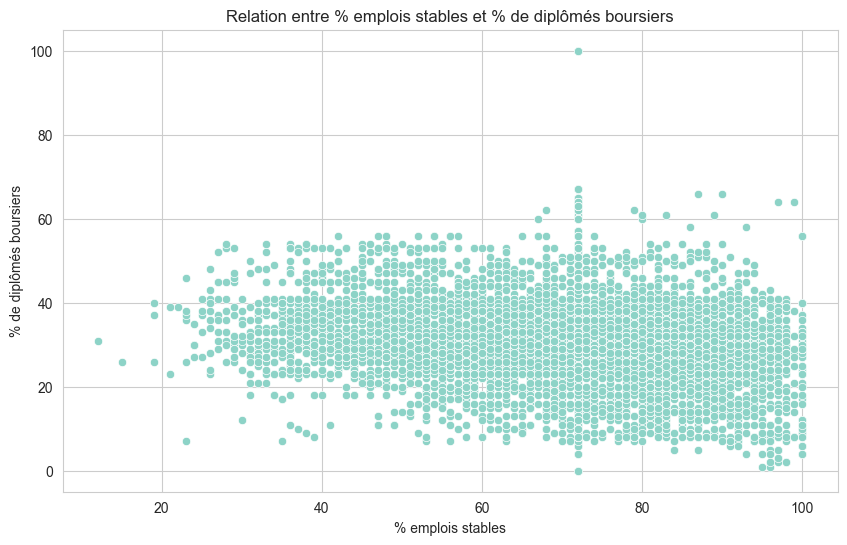

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verification des types de données des colonnes pertinentes et conversion si nécessaire
data_clean["% emplois stables"] = pd.to_numeric(data_clean["% emplois stables"].replace('nd', np.nan), errors='coerce')
data_clean["% de diplômés boursiers"] = pd.to_numeric(data_clean["% de diplômés boursiers"].replace('nd', np.nan), errors='coerce')

# Imputation des valeurs manquantes dans les colonnes pertinentes avec la médiane
data_clean["% emplois stables"].fillna(data_clean["% emplois stables"].median(), inplace=True)
data_clean["% de diplômés boursiers"].fillna(data_clean["% de diplômés boursiers"].median(), inplace=True)

# Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(x="% emplois stables", y="% de diplômés boursiers", data=data_clean)
plt.title("Relation entre % emplois stables et % de diplômés boursiers")
plt.xlabel("% emplois stables")
plt.ylabel("% de diplômés boursiers")
plt.show()


Le graphique de dispersion montre la relation entre le "% d'emplois stables" et le "% de diplômés boursiers". Nous pouvons voir une dispersion des points, mais il n'y a pas de tendance linéaire clairement visible à première vue.

Le K-Means est un algorithme de clustering qui cherche à partitionner les n observations en $k$ clusters dans lesquels chaque observation appartient au cluster avec la moyenne la plus proche. Avant d'appliquer l'algorithme K-Means, nous devons déterminer le nombre optimal de clusters ($k$). Une méthode courante pour cela est la méthode du coude, où nous traçons l'inertie (somme des distances au carré de chaque point à son centre de cluster attribué) pour différentes valeurs de k et choisissons le "coude" du graphique comme valeur de $k$.

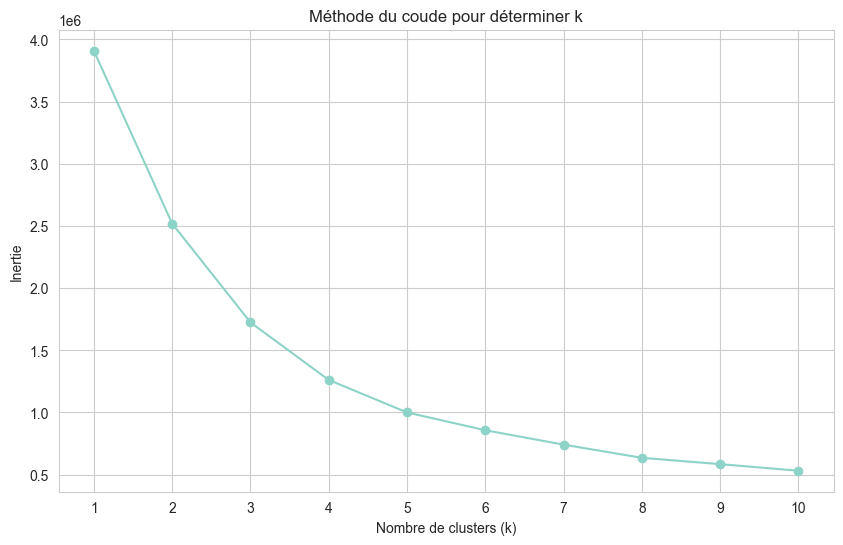

In [61]:
from sklearn.cluster import KMeans

# Sélection des colonnes pertinentes pour le clustering
data_cluster = data_clean[["% emplois stables", "% de diplômés boursiers"]]

# Calcul de l'inertie pour différentes valeurs de k (nombre de clusters)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_cluster)
    inertia.append(kmeans.inertia_)

# Tracer la méthode du coude pour déterminer le nombre optimal de clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Méthode du coude pour déterminer k")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


La méthode du coude ne présente pas un "coude" très clair, ce qui indique qu'il n'y a pas de nombre optimal évident de clusters pour ces données. Cependant, il semble y avoir un léger fléchissement au point $k = 3$. Ainsi, pour les prochaines étapes, nous choisirons $k = 3$ pour le clustering K-Means.

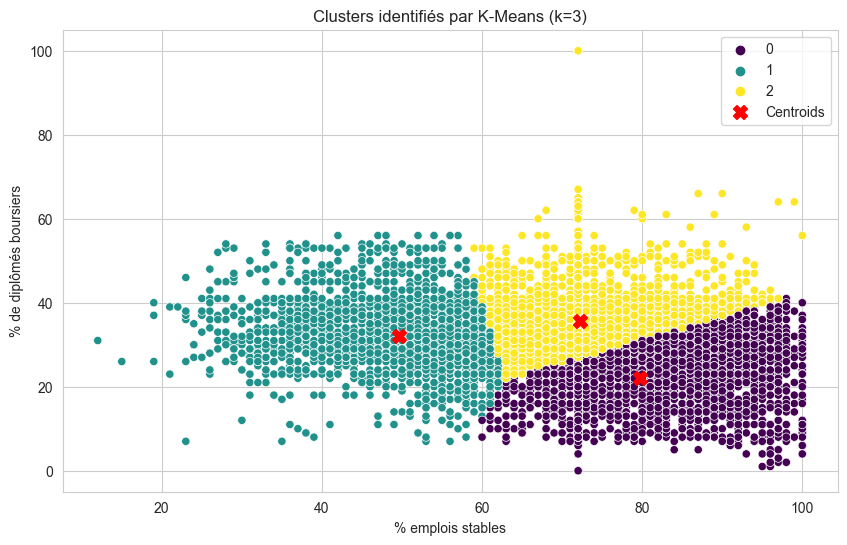

,Cluster,Mean_Emploi_Stable,Mean_Diplomé_Boursier,Count
0,0,79.724159,22.135417,4992
1,1,49.661593,32.083919,2562
2,2,72.271577,35.764607,10115


In [62]:
# Appliquer K-Means avec k=3
kmeans = KMeans(n_clusters=3, random_state=42)
data_clean['Cluster'] = kmeans.fit_predict(data_cluster)

# Visualiser les clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x="% emplois stables", y="% de diplômés boursiers", hue='Cluster', palette='viridis', data=data_clean)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Centroids')
plt.title("Clusters identifiés par K-Means (k=3)")
plt.xlabel("% emplois stables")
plt.ylabel("% de diplômés boursiers")
plt.legend()
plt.show()

# Caractéristiques des clusters
cluster_characteristics = data_clean.groupby('Cluster').agg(
    Mean_Emploi_Stable = ("% emplois stables", "mean"),
    Mean_Diplomé_Boursier = ("% de diplômés boursiers", "mean"),
    Count = ("Cluster", "size")
).reset_index()

cluster_characteristics


### Analyse:
- **Cluster 0** pourrait représenter des domaines ou des disciplines où les étudiants ont généralement un bon taux d'emploi stable après l'obtention de leur diplôme et où il y a un plus faible pourcentage de diplômés boursiers. Cela pourrait indiquer des domaines où la stabilité de l'emploi est élevée et où peut-être l'accès ou l'attractivité pour les étudiants boursiers est plus faible.

- **Cluster 1** est intéressant en ce qu'il semble regrouper des domaines où les étudiants ont à la fois un faible taux d'emploi stable et un pourcentage plus élevé de diplômés boursiers. Cela pourrait indiquer des domaines qui sont potentiellement moins lucratifs ou stables en termes d'emploi, mais qui sont peut-être plus accessibles ou attractifs pour les étudiants boursiers.

- **Cluster 2** a un taux d'emploi stable relativement élevé et aussi le pourcentage le plus élevé de diplômés boursiers, ce qui pourrait indiquer des domaines qui offrent une stabilité d'emploi et sont également accessibles ou attractifs pour les étudiants boursiers.


### Exemple 3 : % femmes → Salaire net médian des emplois à temps plein

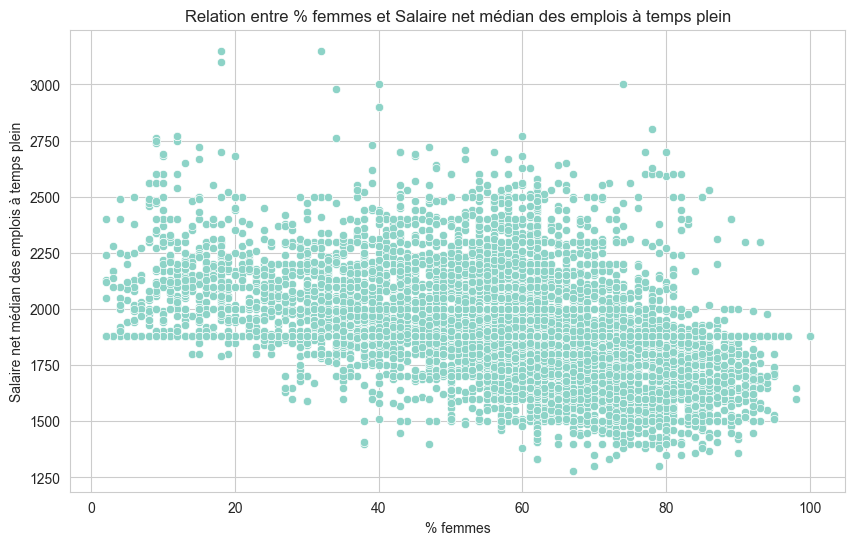

In [65]:
# Verification des types de données des colonnes pertinentes et conversion si nécessaire
data_clean["% femmes"] = pd.to_numeric(data_clean["% femmes"].replace('nd', np.nan), errors='coerce')
data_clean["Salaire net médian des emplois à temps plein"] = pd.to_numeric(data_clean["Salaire net médian des emplois à temps plein"].replace('nd', np.nan), errors='coerce')

# Imputation des valeurs manquantes dans les colonnes pertinentes avec la médiane
data_clean["% femmes"].fillna(data_clean["% femmes"].median(), inplace=True)
data_clean["Salaire net médian des emplois à temps plein"].fillna(data_clean["Salaire net médian des emplois à temps plein"].median(), inplace=True)

# Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(x="% femmes", y="Salaire net médian des emplois à temps plein", data=data_clean)
plt.title("Relation entre % femmes et Salaire net médian des emplois à temps plein")
plt.xlabel("% femmes")
plt.ylabel("Salaire net médian des emplois à temps plein")
plt.show()


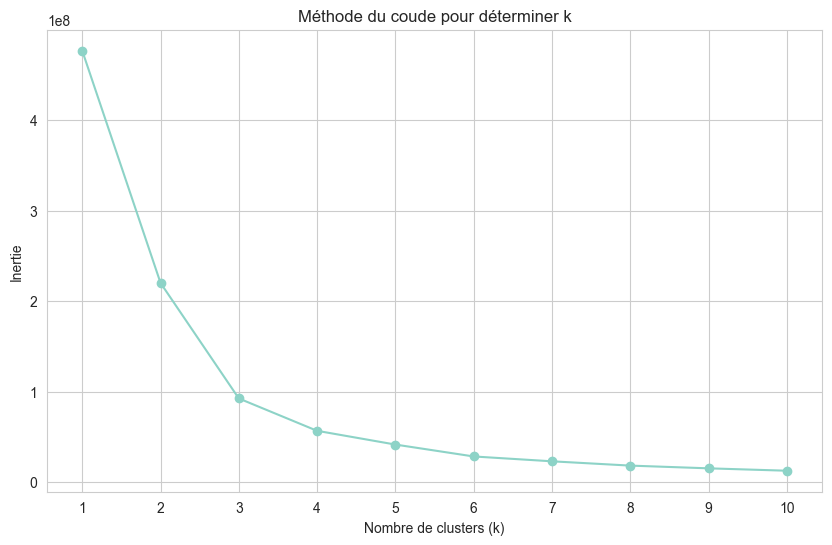

In [66]:
# Sélection des colonnes pertinentes pour le clustering
data_cluster_3 = data_clean[["% femmes", "Salaire net médian des emplois à temps plein"]]

# Calcul de l'inertie pour différentes valeurs de k (nombre de clusters)
inertia_3 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_cluster_3)
    inertia_3.append(kmeans.inertia_)

# Tracer la méthode du coude pour déterminer le nombre optimal de clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_3, marker='o')
plt.title("Méthode du coude pour déterminer k")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


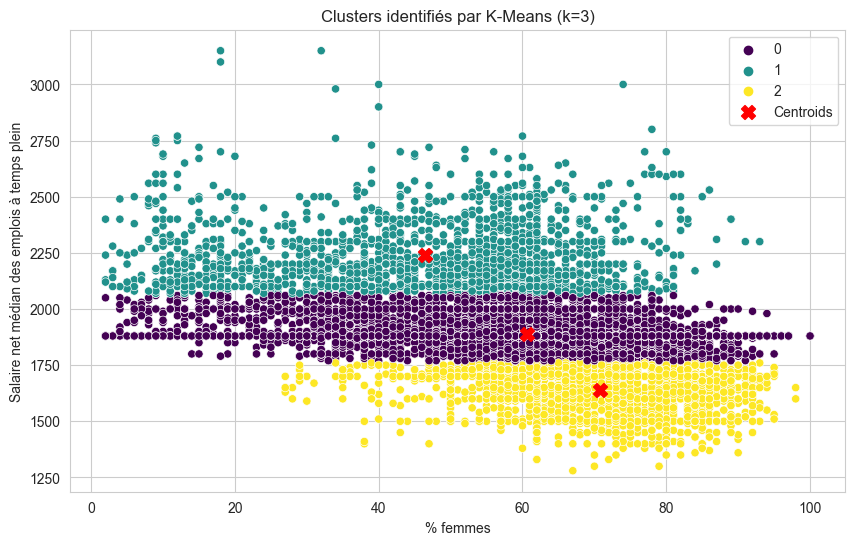

,Cluster,Mean_Percent_Femmes,Mean_Salaire_Net_Median,Count
0,0,60.630487,1887.085393,13350
1,1,46.482172,2241.832145,1823
2,2,70.716747,1638.525641,2496


In [67]:
# Appliquer K-Means avec k=3
kmeans = KMeans(n_clusters=3, random_state=42)
data_clean['Cluster'] = kmeans.fit_predict(data_clean[["% femmes", "Salaire net médian des emplois à temps plein"]])

# Visualiser les clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x="% femmes", y="Salaire net médian des emplois à temps plein", hue='Cluster', palette='viridis', data=data_clean)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Centroids')
plt.title("Clusters identifiés par K-Means (k=3)")
plt.xlabel("% femmes")
plt.ylabel("Salaire net médian des emplois à temps plein")
plt.legend()
plt.show()

# Caractéristiques des clusters
cluster_characteristics = data_clean.groupby('Cluster').agg(
    Mean_Percent_Femmes = ("% femmes", "mean"),
    Mean_Salaire_Net_Median = ("Salaire net médian des emplois à temps plein", "mean"),
    Count = ("Cluster", "size")
).reset_index()

cluster_characteristics


### Analyse:
- **Cluster 0** semble représenter des domaines ou disciplines où il y a une présence relativement équilibrée de femmes (autour de \(60\%\)) et un salaire net médian modéré après l'obtention du diplôme.
  
- **Cluster 1** semble représenter des domaines où la présence de femmes est la plus faible (moins de la moitié), mais où le salaire net médian est le plus élevé parmi les clusters. Cela pourrait indiquer des domaines où, bien que les femmes soient sous-représentées, les salaires sont plus élevés.

- **Cluster 2** pourrait représenter des domaines où les femmes sont fortement représentées, mais où le salaire net médian est le plus bas parmi les clusters. Cela pourrait indiquer des domaines où, bien que les femmes soient bien représentées ou même dominantes, les salaires sont plus bas.
